
### COVID-19 Risky cities in Nuevo Leon and healthcare


# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import json
!pip install geocoder
import geocoder as geocoder
!pip install geopy
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!pip install folium
import folium

print ('Libraries imported')

Libraries imported


## 2. Build Dataframe

In [2]:
df1 = pd.read_csv(r'C:\Users\carlo\Desktop\Casos_Diarios_Municipio_Confirmados_20200726.csv')
df2 = pd.read_excel(r'C:\Users\carlo\Desktop\Municipios NL.xlsx' )

In [3]:
df1.head()

,cve_ent,poblacion,Municipio,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,18-07-2020,19-07-2020,20-07-2020,21-07-2020,22-07-2020,23-07-2020,24-07-2020,25-07-2020,26-07-2020,Total
0,16046,15290,Juarez,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,46
1,16047,22358,Jungapeo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
2,16048,5862,Lagunillas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16049,18769,Madero,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,14
4,5035,744247,Torreon,0,0,0,0,0,0,0,...,19,17,39,60,29,18,19,0,0,3260


In [4]:
df2.head()

,Clave INEGI,Nombre,Municipio,Unnamed: 3,City,Fecha de creación
0,1,Abasolo,Abasolo,"Nuevo Leon, Mexico","Abasolo,Nuevo Leon, Mexico",1825.0
1,2,Agualeguas,Agualeguas,"Nuevo Leon, Mexico","Agualeguas,Nuevo Leon, Mexico",1825.0
2,3,Los Aldamas,Los Aldamas,"Nuevo Leon, Mexico","Los Aldamas,Nuevo Leon, Mexico",1825.0
3,4,Allende,Ciudad de Allende,"Nuevo Leon, Mexico","Ciudad de Allende,Nuevo Leon, Mexico",1850.0
4,5,Anáhuac,Anáhuac,"Nuevo Leon, Mexico","Anáhuac,Nuevo Leon, Mexico",1934.0


In [5]:
Results  = pd.merge(df1,df2, on='Municipio')
Results.head()


,cve_ent,poblacion,Municipio,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,23-07-2020,24-07-2020,25-07-2020,26-07-2020,Total,Clave INEGI,Nombre,Unnamed: 3,City,Fecha de creación
0,19002,2599,Agualeguas,0,0,0,0,0,0,0,...,0,1,0,0,4,2,Agualeguas,"Nuevo Leon, Mexico","Agualeguas,Nuevo Leon, Mexico",1825.0
1,19003,1506,Los Aldamas,0,0,0,0,0,0,0,...,0,0,0,0,1,3,Los Aldamas,"Nuevo Leon, Mexico","Los Aldamas,Nuevo Leon, Mexico",1825.0
2,19013,11962,China,0,0,0,0,0,0,0,...,0,0,0,0,43,13,China,"Nuevo Leon, Mexico","China,Nuevo Leon, Mexico",1825.0
3,19014,37859,Doctor Arroyo,0,0,0,0,0,0,0,...,0,0,0,0,59,14,Doctor Arroyo,"Nuevo Leon, Mexico","Doctor Arroyo,Nuevo Leon, Mexico",1851.0
4,19015,1845,Doctor Coss,0,0,0,0,0,0,0,...,0,0,0,0,3,15,Doctor Coss,"Nuevo Leon, Mexico","Doctor Coss,Nuevo Leon, Mexico",1882.0


In [6]:
df = Results.groupby("City").agg(sum)
df.reset_index(inplace=True)
df


,City,cve_ent,poblacion,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,19-07-2020,20-07-2020,21-07-2020,22-07-2020,23-07-2020,24-07-2020,25-07-2020,26-07-2020,Total,Fecha de creación
0,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,2,6,3,3,1,2,0,0,113,7300.0
1,"Agualeguas,Nuevo Leon, Mexico",19002,2599,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4,1825.0
2,"Aramberri,Nuevo Leon, Mexico",19007,17800,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,17,1877.0
3,"Bustamante,Nuevo Leon, Mexico",47014,12830,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,3664.0
4,"Carmen,Nuevo Leon, Mexico",4003,275478,0,0,0,0,0,0,0,...,8,20,26,19,12,10,0,0,1456,1852.0
5,"China,Nuevo Leon, Mexico",19013,11962,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,43,1825.0
6,"Doctor Arroyo,Nuevo Leon, Mexico",19014,37859,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,59,1851.0
7,"Doctor Coss,Nuevo Leon, Mexico",19015,1845,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1882.0
8,"Galeana,Nuevo Leon, Mexico",27040,52045,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,86,3754.0
9,"General Bravo,Nuevo Leon, Mexico",19020,6127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,46,1868.0


In [7]:
CLIENT_ID = 'QB1IVY2TQKULYUZOT3EQOJLNNFZUEKW3RRZVPGF4XERULEOD' # your Foursquare ID
CLIENT_SECRET = '2UOAHRTUJJFRY0OGN4KTZDGNJ2BE50H3G2OI5M2IJ1GDF14K' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QB1IVY2TQKULYUZOT3EQOJLNNFZUEKW3RRZVPGF4XERULEOD
CLIENT_SECRET:2UOAHRTUJJFRY0OGN4KTZDGNJ2BE50H3G2OI5M2IJ1GDF14K


In [8]:
def getLatLong(row):
    lat_lng_coords = None
    search_query = '{}, Monterrey,Mex'.format(row)
    try:
        while(lat_lng_coords is None):
            g = geocoder.arcgis(search_query)
            lat_lng_coords = g.latlng
    except IndexError:
        latitude = 0.0
        longitude = 0.0
        print('BACKUP')
        return [latitude,longitude]

    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    print(latitude, longitude)
    return [latitude, longitude]

coords_list = df['City'].apply(getLatLong).tolist()

25.70032918972094 -100.35547220667284
26.308298643494034 -99.54682458640987
25.644610000000057 -100.29584999999997
25.737520583069433 -100.33353396290464
25.670000000000073 -100.35758999999996
25.644610000000057 -100.29584999999997
25.730665133042002 -100.33020549721992
25.709449068001252 -100.30290318718892
25.731355049987954 -100.3317549267466
25.665535023745868 -100.33593992718306
25.688640000000078 -100.30792999999994
25.73827051084361 -100.33629985448292
25.680359777776644 -100.3079079783734
25.76451000000003 -100.39954999999998
25.707300000000032 -100.32060999999999
25.733647390488642 -100.32114989139193
24.87898545805285 -99.6698002551803
25.690524331220022 -100.30059275981085
27.017890000000023 -100.50876999999997
25.644610000000057 -100.29584999999997
25.67350005296688 -100.32192492406904
25.785750039287727 -100.41314991210268
25.737549496533287 -100.34177865768736
25.70150374778622 -100.35861209301112
25.740049680976885 -100.33508459516734
25.639307369645003 -100.301272938389

In [9]:
df[['Latitude','Longitude']]=pd.DataFrame(coords_list,columns=['Latitude', 'Longitude'])
df.head()


,City,cve_ent,poblacion,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,21-07-2020,22-07-2020,23-07-2020,24-07-2020,25-07-2020,26-07-2020,Total,Fecha de creación,Latitude,Longitude
0,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,3,3,1,2,0,0,113,7300.0,25.700329,-100.355472
1,"Agualeguas,Nuevo Leon, Mexico",19002,2599,0,0,0,0,0,0,0,...,0,0,0,1,0,0,4,1825.0,26.308299,-99.546825
2,"Aramberri,Nuevo Leon, Mexico",19007,17800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,17,1877.0,25.644610,-100.295850
3,"Bustamante,Nuevo Leon, Mexico",47014,12830,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,3664.0,25.737521,-100.333534
4,"Carmen,Nuevo Leon, Mexico",4003,275478,0,0,0,0,0,0,0,...,26,19,12,10,0,0,1456,1852.0,25.670000,-100.357590


4. Binning the COVID-19 Cases
Let's visualize the total cases in each city by deploying bar graph. Then we devide the data into four bins:
1.Low Risk: 5~82 cases
2.Medium Risk: 82~159 cases
3.High Risk: 159~236 cases
4.Extreme High Risk: 236~313 cases

In [10]:
# Change the "Total Cases" column type from object to integer
df["Total"] = df["Total"].astype(str).astype(int)

# Generate 5 pins by categorizing total cases
bins = np.linspace(min(df["Total"]), max(df["Total"]), 5)
bins

array([   0., 1172., 2344., 3516., 4688.])

In [11]:

group_names = ['Low Risk', 'Medium Risk', 'High Risk', 'Extreme High Risk']
df['Risk Level'] = pd.cut(df['Total'], bins, labels=group_names, include_lowest=True )
df.head()

,City,cve_ent,poblacion,12/1/2020,13-01-2020,14-01-2020,15-01-2020,16-01-2020,17-01-2020,18-01-2020,...,22-07-2020,23-07-2020,24-07-2020,25-07-2020,26-07-2020,Total,Fecha de creación,Latitude,Longitude,Risk Level
0,"Abasolo,Nuevo Leon, Mexico",63004,112397,0,0,0,0,0,0,0,...,3,1,2,0,0,113,7300.0,25.700329,-100.355472,Low Risk
1,"Agualeguas,Nuevo Leon, Mexico",19002,2599,0,0,0,0,0,0,0,...,0,0,1,0,0,4,1825.0,26.308299,-99.546825,Low Risk
2,"Aramberri,Nuevo Leon, Mexico",19007,17800,0,0,0,0,0,0,0,...,0,0,0,0,0,17,1877.0,25.644610,-100.295850,Low Risk
3,"Bustamante,Nuevo Leon, Mexico",47014,12830,0,0,0,0,0,0,0,...,0,0,0,0,0,8,3664.0,25.737521,-100.333534,Low Risk
4,"Carmen,Nuevo Leon, Mexico",4003,275478,0,0,0,0,0,0,0,...,19,12,10,0,0,1456,1852.0,25.670000,-100.357590,Medium Risk


In [12]:
 df[['City','Total', 'Latitude' ,'Longitude','Risk Level']]

,City,Total,Latitude,Longitude,Risk Level
0,"Abasolo,Nuevo Leon, Mexico",113,25.700329,-100.355472,Low Risk
1,"Agualeguas,Nuevo Leon, Mexico",4,26.308299,-99.546825,Low Risk
2,"Aramberri,Nuevo Leon, Mexico",17,25.644610,-100.295850,Low Risk
3,"Bustamante,Nuevo Leon, Mexico",8,25.737521,-100.333534,Low Risk
4,"Carmen,Nuevo Leon, Mexico",1456,25.670000,-100.357590,Medium Risk
5,"China,Nuevo Leon, Mexico",43,25.644610,-100.295850,Low Risk
6,"Doctor Arroyo,Nuevo Leon, Mexico",59,25.730665,-100.330205,Low Risk
7,"Doctor Coss,Nuevo Leon, Mexico",3,25.709449,-100.302903,Low Risk
8,"Galeana,Nuevo Leon, Mexico",86,25.731355,-100.331755,Low Risk
9,"General Bravo,Nuevo Leon, Mexico",46,25.665535,-100.335940,Low Risk


In [13]:

# Lets examine the number of cities falls into each bin
print(df["Risk Level"].value_counts())

Low Risk             29
Extreme High Risk     1
High Risk             1
Medium Risk           1
Name: Risk Level, dtype: int64


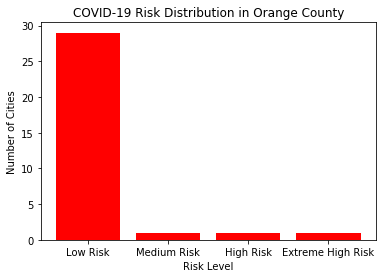

In [14]:

# Create bar chart to visualize the risk distributions in Orange County
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(group_names, df["Risk Level"].value_counts(), color = 'r')

plt.pyplot.title('COVID-19 Risk Distribution in Orange County') 
plt.pyplot.ylabel('Number of Cities')
plt.pyplot.xlabel('Risk Level') 

plt.pyplot.show()

In [15]:
# I choose Irvine as center , and find hospitals within 5000 meters radius. 

mty_lat = 25.6887861
mty_lng = -100.3500984
search_query = 'Hospital'
radius = 15000

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    mty_lat, 
    mty_lng, 
    VERSION, 
    search_query, 
    radius, 
    LIMIT)
url

results_hospital = requests.get(url).json()
results_hospital

{'meta': {'code': 200, 'requestId': '5f1f427337578573437481b0'},
 'response': {'venues': [{'id': '4cdc0b2d6ad1a0932460ef56',
    'name': 'Hospital Universitario (UANL)',
    'location': {'address': 'Av. Francisco I. Madero S/N',
     'crossStreet': 'José Eleuterio González (Gonzalitos)',
     'lat': 25.689160513226717,
     'lng': -100.35029110029933,
     'labeledLatLngs': [{'label': 'display',
       'lat': 25.689160513226717,
       'lng': -100.35029110029933}],
     'distance': 45,
     'postalCode': '64460',
     'cc': 'MX',
     'city': 'Monterrey',
     'state': 'Nuevo León',
     'country': 'México',
     'formattedAddress': ['Av. Francisco I. Madero S/N (José Eleuterio González (Gonzalitos))',
      '64460 Monterrey, Nuevo León',
      'México']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
    

In [16]:
venues = results_hospital['response']['venues']
results_hospital = json_normalize(venues)
print(results_hospital.shape)
results_hospital.head()

(30, 19)


C:\Users\carlo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4cdc0b2d6ad1a0932460ef56,Hospital Universitario (UANL),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1595884591,False,Av. Francisco I. Madero S/N,José Eleuterio González (Gonzalitos),25.689161,-100.350291,"[{'label': 'display', 'lat': 25.68916051322671...",45,64460,MX,Monterrey,Nuevo León,México,[Av. Francisco I. Madero S/N (José Eleuterio G...,NaN,NaN
1,4d61b82a9f67f04dbcc087fb,Doctors Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1595884591,False,Ecuador 2331,Bolivia,25.684624,-100.356103,"[{'label': 'display', 'lat': 25.68462353789592...",759,64620,MX,Monterrey,Nuevo León,México,"[Ecuador 2331 (Bolivia), 64620 Monterrey, Nuev...",38744845,NaN
2,4d3a2d1a63052d431681aac5,Torre de Pediatría (Hospital Universitario),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1595884591,False,Francisco I. Madero,Gonzalitos,25.688907,-100.349703,"[{'label': 'display', 'lat': 25.68890701030672...",41,64460,MX,Monterrey,Nuevo León,México,"[Francisco I. Madero (Gonzalitos), 64460 Monte...",NaN,NaN
3,4e5fead2c65b2dc89e86688b,Urgencias (Hospital Universitario),"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",v-1595884591,False,NaN,NaN,25.688832,-100.349578,"[{'label': 'display', 'lat': 25.68883175363469...",52,64460,MX,Monterrey,Nuevo León,México,"[64460 Monterrey, Nuevo León, México]",NaN,NaN
4,51c05ce3498e2bd1d044a30c,"Centro de Fototerapia, Láser e Investigación C...","[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1595884591,False,Av. Francisco I. Madero S/N,José Eleuterio González (Gonzalitos),25.689218,-100.349863,"[{'label': 'display', 'lat': 25.68921848558906...",53,NaN,MX,Monterrey,Nuevo León,México,[Av. Francisco I. Madero S/N (José Eleuterio G...,NaN,NaN


In [17]:

# The dataframe needs to be cleaned.
# We want to keep only hospital name and location. 

filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
results_hospital = results_hospital.loc[:, filtered_columns]
print(results_hospital.shape)
results_hospital.head()

(30, 4)


,name,categories,location.lat,location.lng
0,Hospital Universitario (UANL),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",25.689161,-100.350291
1,Doctors Hospital,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",25.684624,-100.356103
2,Torre de Pediatría (Hospital Universitario),"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",25.688907,-100.349703
3,Urgencias (Hospital Universitario),"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",25.688832,-100.349578
4,"Centro de Fototerapia, Láser e Investigación C...","[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",25.689218,-100.349863


In [18]:
# Identify Animal hospitals and drop them off the dataframe.

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
results_hospital['categories'] = results_hospital.apply(get_category_type, axis=1)
results_hospital.columns = [column.split('.')[-1] for column in results_hospital.columns]

# Include only Hospitals and Medical Centers
results_hospital = results_hospital[(results_hospital.categories == 'Hospital') | (results_hospital.categories == 'Medical Center')]

# Exclude hospital names that contain animal, pet, etc.
results_hospital = results_hospital[~results_hospital['name'].str.contains('Animal')]
results_hospital = results_hospital[~results_hospital['name'].str.contains('Pet')]
results_hospital = results_hospital[~results_hospital['name'].str.contains('Veterinary')]

results_hospital = results_hospital.reset_index(drop = True)
print(results_hospital.shape)
results_hospital.head()

(24, 4)


,name,categories,lat,lng
0,Hospital Universitario (UANL),Hospital,25.689161,-100.350291
1,Doctors Hospital,Hospital,25.684624,-100.356103
2,Torre de Pediatría (Hospital Universitario),Hospital,25.688907,-100.349703
3,"Centro de Fototerapia, Láser e Investigación C...",Hospital,25.689218,-100.349863
4,Consulta de Oftalmología (Hospital Universitario),Hospital,25.688216,-100.350202


In [19]:
def getNearbyHospital(names, latitudes, longitudes, radius=5000):
    
    hospitals_list=[] 
    search_query = 'Hospital'
    
    # create the API request URL
    for name, lat, lng in zip(names, latitudes, longitudes):
        LIMIT=100
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
           CLIENT_ID, 
           CLIENT_SECRET, 
           lat, 
           lng, 
           VERSION, 
           search_query, 
           radius, 
           LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        #res = results_hos[0]
        #print(res.keys())
        #print((results_hos[0]))

        # return only relevant information for each nearby venue
        hospitals_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],
            v['categories']) for v in results])
        #print (hospitals_list)

    hospitals = pd.DataFrame([hospital for hospital_list in hospitals_list for hospital in hospital_list])
    hospitals.columns = ['City',
                         'City Latitude',
                         'City Longitude',
                         'Hospital', 
                         'Hospital Latitude',
                         'Hospital Longitude',
                         'Categories']
    
    #return(dataframe_filtered)
    return hospitals

In [41]:
!conda install -c conda-forge folium=0.5.0 --yes

import folium # plotting library

# create map 
map_mty = folium.Map(location=[mty_lat,mty_lng], zoom_start=11)

# add markers to map
for lat, lng, label in zip(results_hospital['lat'], results_hospital['lng'], results_hospital['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mty)  
    
map_mty 


Solving environment: ...working... done

# All requested packages already installed.



In [ ]:

m = folium.Map(
    location=[45.5236, -122.6750],
    tiles='Stamen Toner',
    zoom_start=13
)

folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(m)

folium.CircleMarker(
    location=[45.5215, -122.6261],
    radius=50,
    popup='Laurelhurst Park',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(m)


m